# Samridhi Kohli
## 169108125
### Regression and Forecasting Analysis Assignment

## Problem 1

This exercise considers an example of data that do not satisfy all the standard assumptions of simple
regression. The dataset contains survey outcomes of a travel agency that wishes to improve
recommendation strategies for its clients. The dataset contains 26 observations on age and average daily
expenditures during holidays. (Data is given in Test Exercise-1)

(a) Use all data to estimate the coefficients a and b in a simple regression model, where expenditures is the
dependent variable and age is the explanatory factor. Also compute the standard error and the t-value of b.

(b) Make the scatter diagram of expenditures against age and add the regression line y = a + bx of part (a) in
this diagram. What conclusion do you draw from this diagram?

(c) It seems there are two sets of observations in the scatter diagram, one for clients aged 40 or higher and
another for clients aged below 40. Divide the sample into these two clusters, and for each cluster estimate
the coefficients a and b and determine the standard error and t-value of b.

(d) Discuss and explain the main differences between the outcomes in parts (a) and (c). Describe in words
what you have learned from these results

In [3]:
#impoerting libraries
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
#reading file
df = pd.read_excel("D:\Manipal\Regression\TestExer1-holiday expenditures-round2.xlsx") 
df

,Observation,Age,Expenditures
0,1,49,95
1,2,15,104
2,3,43,91
3,4,45,98
4,5,40,94
5,6,35,107
6,7,42,96
7,8,38,108
8,9,46,98
9,10,30,108


### Answer 1

In [7]:
def getLine(dataframe):
    X = dataframe.Age
    Y = dataframe.Expenditures

    # Coefficient b
    beta2 = ((X*Y).mean() - X.mean()*Y.mean()) / ((X**2).mean() - (X.mean())**2)
    XMean = X.mean()
    YMean = Y.mean()

    # Coefficient a
    beta1 = YMean - beta2*XMean
    dataframe["error"] = Y - beta1 - beta2*X
    sum_squared_error = (dataframe.error ** 2).sum()
    n = dataframe.shape[0]
    sd = math.sqrt(1/(n-2) * sum_squared_error)
    dataframe["c"] = (dataframe.Age - XMean) / ((dataframe.Age - XMean)**2).sum()
    beta = beta2 - (dataframe.c * dataframe.error).sum()
    sd_b_squared = sd**2 / ((X - XMean)**2).sum()
    t_b = (beta2 - beta)/sd_b_squared
    return beta2,beta1,sum_squared_error,sd,sd_b_squared,t_b,beta,dataframe

In [18]:
b,a,sum_squared_error,sd,sd_b_squared,t_b,beta, df = getLine(df)
print("Value of a, the intercept, rounded to 3 digits is: ", round(a, 3))
print("Value of b, the coefficient, rounded to 3 digits is: ",round(b,3))
print("The standard error rounded to 3 digits is: ", round(sd, 3))
print("The value of beta rounded to 3 digits is: ", round(beta, 3))
print("The t value of b is: ", t_b)

Value of a, the intercept, rounded to 3 digits is:  114.241
Value of b, the coefficient, rounded to 3 digits is:  -0.334
The standard error rounded to 3 digits is:  5.073
The value of beta rounded to 3 digits is:  -0.334
The t value of b is:  2.3192507640065496e-13


### Answer 2

Text(0.5, 1.0, 'Expenditures against Age')

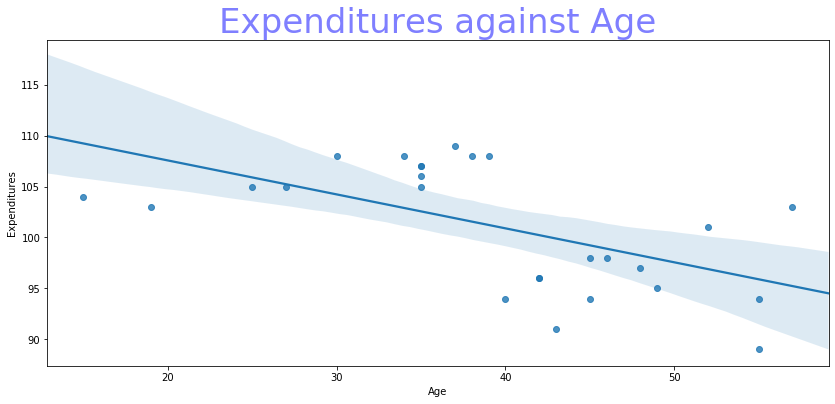

In [11]:
plot = sns.regplot(data=df, x= "Age", y= "Expenditures")
plot.figure.set_size_inches(14,6)
plot.axes.set_title('Expenditures against Age', fontsize=34,color="b",alpha=0.5)

It can be observed from the scatter plot that there is a decreasing trend between expenditures and age. That
is the expenditure on hotels decreases as age increases

### Answer 3 Part 1 - Age less than 40
Splitting the dataset for under 40 years of age

In [12]:
msk = df.Age < 40
lessThan40 = df[msk].copy()

In [19]:
b,a,sum_squared_error,sd,sd_b_squared,t_b,beta,lessThan40 = getLine(lessThan40)
print("Value of a, the intercept, rounded to 3 digits is: ", round(a, 3))
print("Value of b, the coefficient, rounded to 3 digits is: ",round(b,3))
print("The standard error rounded to 3 digits is: ", round(sd, 3))
print("The value of beta rounded to 3 digits is: ", round(beta, 3))
print("The t value of b is: ", t_b)

Value of a, the intercept, rounded to 3 digits is:  100.232
Value of b, the coefficient, rounded to 3 digits is:  0.198
The standard error rounded to 3 digits is:  1.153
The value of beta rounded to 3 digits is:  0.198
The t value of b is:  6.058600559007853e-13


### Answer 3 Part 2 - Age equal or greater than 40
Splitting the dataset for 40 years of age or more

In [16]:
msk = df.Age >= 40
greaterThanEqualTo40 = df[msk].copy()

In [21]:
b,a,sum_squared_error,sd,sd_b_squared,t_b,beta,greaterThan40 = getLine(greaterThanEqualTo40)
print("Value of a, the intercept, rounded to 3 digits is: ", round(a, 3))
print("Value of b, the coefficient, rounded to 3 digits is: ",round(b,3))
print("The standard error rounded to 3 digits is: ", round(sd, 3))
print("The value of beta rounded to 3 digits is: ", round(beta, 3))
print("The t value of b is: ", t_b)

Value of a, the intercept, rounded to 3 digits is:  88.872
Value of b, the coefficient, rounded to 3 digits is:  0.146
The standard error rounded to 3 digits is:  3.833
The value of beta rounded to 3 digits is:  0.146
The t value of b is:  -6.575460987742856e-13


### Answer 4
Plotting the two data subsets, that is greater than 40 and less than 40, to see visuals cues that confirm our
analysis

Text(0.5, 1.0, 'Expenditures against Age for Old')

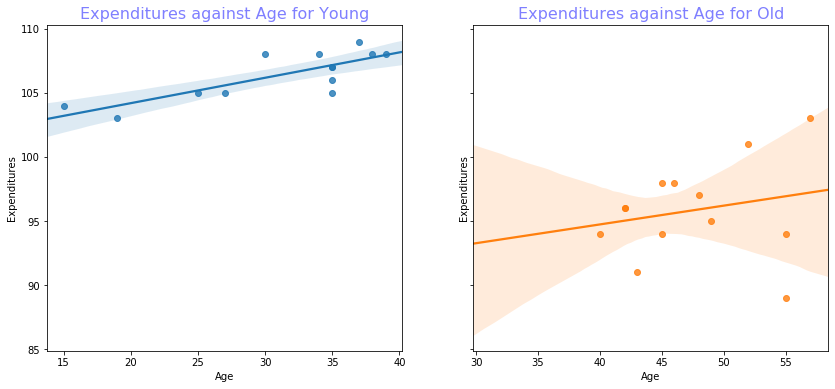

In [23]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.regplot(x = lessThan40.Age, y = lessThan40.Expenditures, ax = ax1)
ax1.figure.set_size_inches(14,6)
ax1.axes.set_title('Expenditures against Age for Young', fontsize=16,color="b",alpha=0.5)
sns.regplot(x = greaterThan40.Age, y = greaterThan40.Expenditures, ax = ax2)
ax2.figure.set_size_inches(14,6)
ax2.axes.set_title('Expenditures against Age for Old', fontsize=16,color="b",alpha=0.5)

1. Unlike the chart in Answer 1 the individual trends are quite the opposite. In Answer 1, the overal trend
was decreasing. However for both the clusters, we can see an increasing trend with age. The reason for
overall trend to be negative was because the expenditure for people under 40 is much more than the
second cluster and hence with increasing age, the overall spend tends to come down.
2. For people under 40, the expense incrase with age is steeper than the other cluster. They spending
habits are more senstive to age. The second cluster is relatively stable as can be seen with the lower
slope of the regression line.

## Problem-2

This test exercise is of an applied nature and uses data that are available in the data file TestExer2. The
question of interest is whether the study results of students in Economics can be predicted from the scores
on entrance tests taken before they start their studies. More precisely, you are asked to investigate whether
verbal and mathematical entrance tests predict freshman grades of students in Economics. Data are
available for 609 students on the following variables: ● FGPA: Freshman grade point average (scale 0-4) ●
SATV: Score on SAT Verbal test (scale 0-10) ● SATM: Score on SAT Mathematics test (scale 0-10) ● FEM:
Gender dummy (1 for females, 0 for males)

(a)

(i) Regress FGPA on a constant and SATV. Report the coefficient of SATV and its standard error and p-value
(give your answers with 3 decimals).
(ii) Determine a 95% confidence interval (with 3 decimals) for the effect on FGPA of an increase by 1 point in
SATV.

(b) Answer questions (a-i) and (a-ii) also for the regression of FGPA on a constant, SATV, SATM, and FEM.

(c) Determine the (4 X 4) correlation matrix of FGPA, SATV, SATM, and FEM. Use these correlations to
explain the differences between the outcomes in parts (a) and (b).

(d)
(i) Perform an F-test on the significance (at the 5% level) of the effect of SATV on FGPA, based on the
regression in part (b) and another regression.
Note: Use the F-test in terms of SSR or R2 and use 6 decimals in your computations. The relevant critical
value is 3.9.
(ii) Check numerically that F = t2.

In [24]:
#importing libraries
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression as fp

In [26]:
#reading file
df1 = pd.read_excel("D:\Manipal\Regression\TestExer2.xlsx") 
df1

,Observation,FGPA,SATM,SATV,FEM
0,1,2.518,4.0,4.0,1
1,2,2.326,4.9,3.1,0
2,3,3.003,4.4,4.0,1
3,4,2.111,4.9,3.9,0
4,5,2.145,4.3,4.7,0
5,6,1.917,5.1,4.1,1
6,7,2.725,4.9,4.5,0
7,8,3.364,4.9,4.6,1
8,9,2.472,4.4,5.1,1
9,10,2.720,5.2,4.4,1


In [27]:
SATV = df1.SATV.values.reshape(-1,1) # independent variable
FGPA = df1.FGPA # dependent variable

### Part A

In [28]:
model_a = LinearRegression()
model_a.fit(X=SATV, y=FGPA)
F_test, P_value = fp(SATV, FGPA)
FGPA_pred = model_a.predict(SATV)
SSE_a = ((FGPA - FGPA_pred)**2).sum() # sum of squared error
s_a = np.sqrt((SSE_a)/(len(FGPA)-2)) # standard error for part a
s_b_sq = s_a**2 / ((SATV - SATV.mean())**2).sum() # std. error sq of slope
s_b = np.sqrt(s_b_sq)
lower_limit = (model_a.coef_[0] - 1.96*s_b)
upper_limit = model_a.coef_[0] + 1.96*s_b
conf_interval = [lower_limit, upper_limit]

In [31]:
print('-' * 100)
print('OLS Estimators')
print('-' * 100)
print("The coefficient rounded to 3 decimals is: ", round(model_a.coef_[0], 3))
print("The intercept rounded to 3 decimals is: ", round(model_a.intercept_, 3))
print("The P-Value rounded to 3 decimals is: ", round(P_value[0], 3))
print('-' * 100)
print('Part a - 1: coefficient of SATV and its standard error and p-value')
print('-' * 100)
print("The coefficient rounded to 3 decimals is: ", round(model_a.coef_[0], 3))
print("The Standard error of Slope rounded to 3 decimals is: ", round(s_b, 3))
print("The P-Value rounded to 3 decimals is: ", round(P_value[0], 3))
print('-' * 100)
print("Part a - 2: 95% confidence interval (with 3 decimals)")
print('-' * 100)
print("The 95% confidence interval for effect on FGPA with an increase by 1 point is:\n", conf_interval)

----------------------------------------------------------------------------------------------------
OLS Estimators
----------------------------------------------------------------------------------------------------
The coefficient rounded to 3 decimals is:  0.063
The intercept rounded to 3 decimals is:  2.442
The P-Value rounded to 3 decimals is:  0.023
----------------------------------------------------------------------------------------------------
Part a - 1: coefficient of SATV and its standard error and p-value
----------------------------------------------------------------------------------------------------
The coefficient rounded to 3 decimals is:  0.063
The Standard error of Slope rounded to 3 decimals is:  0.028
The P-Value rounded to 3 decimals is:  0.023
----------------------------------------------------------------------------------------------------
Part a - 2: 95% confidence interval (with 3 decimals)
---------------------------------------------------------------

### Part B

In [33]:
X = df1[["SATV", "SATM", "FEM"]] # independent variable
y = df1.FGPA # dependent variable

In [34]:
import statsmodels.formula.api as smf

In [37]:
model_b = LinearRegression()
model_b.fit(X, y)
np.around(model_b.coef_, 3)
mlm = smf.ols(formula='FGPA ~ SATM+SATV+FEM',data = df1).fit()
y_pred = model_b.predict(X)
SSE_a2 = ((y - y_pred)**2).sum() # sum of squared error
s_a2 = np.sqrt((SSE_a2)/(len(X)-2)) # standard error
s_b2_sq = s_a2**2 / ((df1.SATV - df1.SATV.mean())**2).sum() # SSE SATV
s_b2 = np.sqrt(s_b2_sq)
lower_limit = (model_b.coef_[0] - 1.96*s_b2)
upper_limit = model_b.coef_[0] + 1.96*s_b2
conf_interval = [lower_limit, upper_limit]

In [38]:
print('-' * 100)
print("The coefficient rounded to 3 decimals is: ", round(model_b.coef_[0], 3))
print("The Standard error of Slope rounded to 3 decimals is: ", round(s_b2, 3))
print("The P-Value rounded to 3 decimals is: ",round(mlm.pvalues['SATV'],3))
print('-' * 100)
print("The 95% confidence interval for effect on FGPA with an increase by 1 point is:\n", conf_interval)

----------------------------------------------------------------------------------------------------
The coefficient rounded to 3 decimals is:  0.014
The Standard error of Slope rounded to 3 decimals is:  0.027
The P-Value rounded to 3 decimals is:  0.612
----------------------------------------------------------------------------------------------------
The 95% confidence interval for effect on FGPA with an increase by 1 point is:
 [-0.03798286169651114, 0.06630665477720396]


### Part C

In [39]:
df1.iloc[:,1:].corr()

,FGPA,SATM,SATV,FEM
FGPA,1.000000,0.195040,0.092167,0.176491
SATM,0.195040,1.000000,0.287801,-0.162680
SATV,0.092167,0.287801,1.000000,0.033577
FEM,0.176491,-0.162680,0.033577,1.000000


It shows that the correlation between SATV and FGPA is less than 10% and much smaller than the other two
pairs. So when stronger predictors introduced into the model, the influence of SATV will become insignificant

### Part D

In [40]:
subset_df = df1[["FGPA", "SATV", "SATM", "FEM"]]
model_h0 = LinearRegression()
X_h0 = df1[["SATM", "FEM"]]
y_h0 = df1.FGPA
model_h0.fit(X_h0, y_h0)
y_pred_h0 = model_h0.predict(X_h0)
SSR_h0_sq = (y_h0 - y_pred_h0)**2
SSR_h0 = SSR_h0_sq.sum()
r_sq_h0 = r2_score(y_h0, y_pred_h0)
SSR_b_sq = (y - y_pred)**2
SSR_b = SSR_b_sq.sum()
r_sq_b = r2_score(y, y_pred)
F = (SSR_h0 - SSR_b) / (SSR_b / 605)

In [41]:
# Modified Model - SSR and R-squared
print("The Modified Model SSR rounded to 6 decimals is: ", format(SSR_h0, '.6f'))
print("The Modified Model R^2 rounded to 6 decimals is: ", format(r_sq_h0, '.6f'))
# Part B Model - SSR and R-squared
print("\n")
print("The Part-B Model SSR rounded to 6 decimals is: ", format(SSR_b, '.6f'))
print("The Part-B Model R^2 rounded to 6 decimals is: ", format(r_sq_b, '.6f'))
# F Statistic
print("\n")
print("The F statistic rounded to 3 decimals is: ", format(F, '.3f'))

The Modified Model SSR rounded to 6 decimals is:  118.151224
The Modified Model R^2 rounded to 6 decimals is:  0.082575


The Part-B Model SSR rounded to 6 decimals is:  118.101025
The Part-B Model R^2 rounded to 6 decimals is:  0.082965


The F statistic rounded to 3 decimals is:  0.257


Since the value of the F-statistic is less than the provided critical value, we can safely conclude that the Null
hypothesis H is not rejected.